# Model 1: Text Classification with Naive Bayes using `sklearn`

Our goal is to build a ML model that uses the features to predict the label:
- **Feature:** A bag of words (questions from Quora users; `question_text` in the `train.csv` and `test.csv` datasets)
- **Label (Binary):** Insincere (TRUE or FALSE; `target` in the `train.csv` dataset)

## Step 1: Import libraries

Ensure that all the required libraries have been installed by running `pip install <LIBRARY>` in the terminal.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score

## Step 2: Load data

In [ ]:
# loading train and test datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# printing the first 5 rows of train dataset
train.head()

# printing the first 5 rows of test dataset
test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


## Step 3: Perform Text Vectorization

Text Vectorization is the process of converting text into numerical representation.

For our use case, we are converting `question_text` to a matrix of TF-IDF (which measures the frequency of a word in a text against its overall frequency in the corpus) features.

In [ ]:
text_vectorizer = TfidfVectorizer(max_features=2000)

train_vector = text_vectorizer.fit_transform(train["question_text"])
test_vector = text_vectorizer.transform(test["question_text"])

## Step 4: Splitting X and Y into training and validation sets

As Quora provided the train and test datasets separately, there is no need to split X and Y into training and testing sets. Instead, X and Y are split into training and validation sets.

The `stratify` argument is used for Y to be split into training and validation sets as they are in the original dataset.

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(
    train_vector,
    train["target"],
    test_size=0.2,
    stratify=train["target"],
    random_state=42)

## Step 5: Set up classifiers

The chosen classifers is the following models:

    - Multinomial Naive Bayes

In [ ]:
# setting up the Multinomial model
multinomial_model = MultinomialNB()

## Step 6: Train the chosen classifiers and calculate metrics

The metrics that are used to analyze the performance are:

    - F-1 Score
    - ROC AUC Score

Along with these two scores, the confusion matrix is displayed with a _heatmap_.

[Text Classification using MultinomialNB()]
   1) F1 score: 0.35
      - Mean F1 score for train set in cross validation: 0.35
      - Standard deviation of F1 score for train set in cross validation: 0.00
      - Mean F1 score for test set in cross validation: 0.35
      - Standard deviation of F1 score for test set in cross validation: 0.00
   2) ROC AUC score: 0.88
      - Mean ROC AUC score for train set in cross validation: 0.89
      - Standard deviation of ROC AUC score for train set in cross validation: 0.00
      - Mean ROC AUC score for test set in cross validation: 0.88
      - Standard deviation of ROC AUC score for test set in cross validation: 0.00
   3) ROC Curve


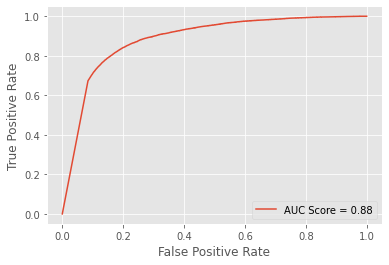

   4) Confusion Matrix


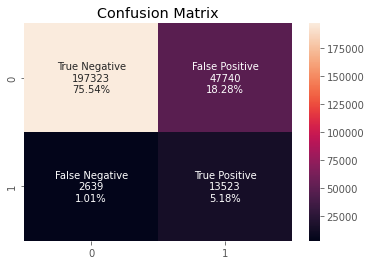

In [ ]:
# scaling X
scaler_X = StandardScaler(with_mean=False)
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

# creating a method that train the model, predict using the model, and calculate metrics
def model_and_predict(model, X_train_scaled, y_train, X_val_scaled, y_val):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    y_pred_auc = model.predict_proba(X_val_scaled) # auc score uses predict_proba() under the hood, not predict()

    f1 = f1_score(y_val, y_pred)
    f1_train_cv = cross_val_score(model, X_train_scaled, y_train, scoring="f1", cv=10)
    mean_f1_train_cv = f1_train_cv.mean()
    std_f1_train_cv = f1_train_cv.std()
    f1_test_cv = cross_val_score(model, X_val_scaled, y_val, scoring="f1", cv=10)
    mean_f1_val_cv = f1_test_cv.mean()
    std_f1_val_cv = f1_test_cv.std()
    fpr, tpr, _ = roc_curve(y_val, y_pred_auc[:, 1])
    auc = roc_auc_score(y_val, y_pred_auc[:, 1])
    auc_train_cv = cross_val_score(model, X_train_scaled, y_train, scoring="roc_auc", cv=10)
    mean_auc_train_cv = auc_train_cv.mean()
    std_auc_train_cv = auc_train_cv.std()
    auc_val_cv = cross_val_score(model, X_val_scaled, y_val, scoring="roc_auc", cv=10)
    mean_auc_val_cv = auc_val_cv.mean()
    std_auc_val_cv = auc_val_cv.std()
    conf_matrix = confusion_matrix(y_val, y_pred)

    print("[Text Classification using %s]"%(model))
    print("   1) F1 score: %.2f"%(f1))
    print("      - Mean F1 score for train set in cross validation: %.2f"%(mean_f1_train_cv))
    print("      - Standard deviation of F1 score for train set in cross validation: %.2f"%(std_f1_train_cv))
    print("      - Mean F1 score for test set in cross validation: %.2f"%(mean_f1_val_cv))
    print("      - Standard deviation of F1 score for test set in cross validation: %.2f"%(std_f1_val_cv))
    print("   2) ROC AUC score: %.2f"%(auc))
    print("      - Mean ROC AUC score for train set in cross validation: %.2f"%(mean_auc_train_cv))
    print("      - Standard deviation of ROC AUC score for train set in cross validation: %.2f"%(std_auc_train_cv))
    print("      - Mean ROC AUC score for test set in cross validation: %.2f"%(mean_auc_val_cv))
    print("      - Standard deviation of ROC AUC score for test set in cross validation: %.2f"%(std_auc_val_cv))
    print("   3) ROC Curve")
    plt.plot(fpr, tpr, label='AUC Score = %.2f'%(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    # plt.savefig('C:/Users/Soohyun/Desktop/UW MGTE \'23/YEAR 4/4B/MSCI 546/Term Project/quora-insincere-questions/1_baseline_classification/images/roc_curve_log_reg.png')
    # plt.close()
    print("   4) Confusion Matrix")
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_matrix, annot=labels, fmt='')
    plt.title("Confusion Matrix")
    plt.show()
    # plt.savefig('C:/Users/Soohyun/Desktop/UW MGTE \'23/YEAR 4/4B/MSCI 546/Term Project/quora-insincere-questions/1_baseline_classification/images/confusion_matrix_log_reg.png')
    # plt.close()

# calling method above for every model but commenting it out to reduce computational time
# baseline_models = [log_model, svm_model, bernoulli_model]

# calling method above for logistic regression model only
baseline_models = [multinomial_model]
for model in baseline_models:
    model_and_predict(model, X_train_scaled, y_train, X_val_scaled, y_val)